In [13]:
from surprisal import AutoHuggingFaceModel
from collections import Counter
from wordfreq import word_frequency
from wordfreq import zipf_frequency
from scipy import stats

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import replicate
import tqdm
from tqdm import tqdm
import time
import string


warnings.filterwarnings('ignore')

In [14]:
ls 

README.md            gpt4v_temp_1125.pkl  project.ipynb
data/                output.png
eval.ipynb           plot/


# Replicate API

Minigpt-4 is hosted on [replicate](https://replicate.com/daanelson/minigpt-4/versions/b96a2f33cc8e4b0aa23eacfce731b9c41a7d9466d9ed4e167375587b54db9423), with an API available for deployment.

| Parameter          | Interpretation                                                                                                                        | Default | Min  | Max |
|--------------------|---------------------------------------------------------------------------------------------------------------------------------------|---------|------|-----|
| num_beams          | number of beams for beam search decoding                                                                                              | 3       | 1    | 10  |
| temperature        | temperature for generating tokens, lower = more predictable results                                                                   | 1    | 0.01 | 2   |
| top_p              | sample from the top p percent most likely tokens                                                                                      | 0.9     | 0    | 1   |
| repetition_penalty | penalty for repeated words in generated text; 1 is no penalty, values greater than 1 discourage repetition, less than 1 encourage it. | 1       | 0.01 | 5   |
| max_new_tokens     | maximum number of new tokens to generate                                                                                              | 3000    | 1    |     |
| max_length         | total length of prompt and output in tokens                                                                                           | 4000    | 1    |     |                                                                                             

In [202]:
cred_path = "../../../Desktop/others/anlp_project/credential.txt"
image_path = "data/pic.png"

In [203]:
with open(cred_path, encoding = 'utf-8') as f:
  key = f.readline().strip()

os.environ["REPLICATE_API_TOKEN"] = key

# Retrieve descriptions from MiniGPT-4

In [204]:
def get_description(iteration, beams, temp, top_p, repetition):
  col = []
  val = []

  prompt = "Please tell me everything you see going on in this picture."

  for i in np.arange(0, iteration, 1):
    col.append(i)
    output = replicate.run("daanelson/minigpt-4:b96a2f33cc8e4b0aa23eacfce731b9c41a7d9466d9ed4e167375587b54db9423",
                           input={"image": open(image_path, "rb"),
                                  "prompt": prompt,
                                  "num_beams": beams,
                                  "temperature": temp,
                                  "top_p": top_p,
                                  "repetition_penalty": repetition})
    val.append(output)

  data = {"iteration" : col,
          "num_beam" : [beams] * len(col),
          "temperature" : [temp] * len(col),
          "top_p" : [top_p] * len(col),
          "description": val
      }

  df = pd.DataFrame(data)

  return df

In [206]:
def get_description_df(param_list, iteration, top_p, temperature, repetition):
  df = pd.DataFrame()
  for i in tqdm(param_list):
    #df = df.extend(get_description(iteration, beams, i, top_p, repetition))
    #get_description(iteration, beams, temp, top_p, repetition)
    new = get_description(iteration, i, temperature, top_p, repetition)
    df = pd.concat([df, new])
  df = df.reset_index(drop=True)

  return df

In [208]:
# temps = np.arange(0.01, 2.002, 0.002)
# tempsplit = np.array_split(temps, 20)

# for temp in tempsplit:
#     df_continue = get_description_df(param_list = temp,
#                    iteration = 1,
#                    beams = 1,
#                    top_p = 0.9,
#                    repetition = 1)
#     temp_name = str(np.round(temp[-1], decimals=3))
#     df_continue.to_pickle('data/temp_data/df_'+temp_name+'.pkl')

In [211]:
# topp = np.arange(0.002, 1.001, 0.001)
# topplist = np.array_split(topp, 20)

# for p in topplist:
#     df_continue = get_description_df(param_list = p,
#                    iteration = 1,
#                    beams = 1,
#                    temperature = 1,
#                    repetition = 1)
#     p_name = str(np.round(p[-1], decimals=3))
#     df_continue.to_pickle('data/topp_data/df_'+p_name+'.pkl')

In [220]:
# temps = np.arange(0.001, 1.001, 0.001)
# tempsplit = np.array_split(temps, 200)

# folder_path = 'data/temp_data_4v/'
# dfs = []

# for filename in os.listdir(folder_path):
#     if filename.endswith('.pkl'):  
#         file_path = os.path.join(folder_path, filename)
#         df = pd.read_pickle(file_path)  
#         dfs.append(df)
        
# df_temp_4v = pd.concat(dfs, ignore_index=True)

In [221]:
# topps = np.arange(0.001, 1.001, 0.001)
# toppsplit = np.array_split(topps, 200)

# folder_path = 'data/topp_data_4v/'
# dfs = []

# for filename in os.listdir(folder_path):
#     if filename.endswith('.pkl'):  
#         file_path = os.path.join(folder_path, filename)
#         df = pd.read_pickle(file_path)  
#         dfs.append(df)
        
# df_topp_4v = pd.concat(dfs, ignore_index=True)

In [ ]:
# df_temp_4v = complete_dataframe(df_temp_4v, 'GPT-4V')
# df_temp_4v.to_pickle("data/temp_4v_complete.pkl")

# df_topp_4v = complete_dataframe(df_topp_4v, 'GPT-4V')
# df_topp_4v.to_pickle("data/topp_4v_complete.pkl")

In [ ]:
# cleandf_temp_4v = remove_outliers(df_temp_4v, ['uid', 'avg_freq', 'avg_info'])
# cleandf_topp_4v = remove_outliers(df_topp_4v, ['uid', 'avg_freq', 'avg_info'])

# cleandf_temp_4v['group'] = ['GPT-4V-Temp'] * cleandf_temp_4v.shape[0]
# cleandf_topp_4v['group'] = ['GPT-4V-TopP'] * cleandf_topp_4v.shape[0]

# cleandf_gpt4v =  pd.concat([cleandf_temp_4v, cleandf_topp_4v]).reset_index(drop=True)
# cleandf_gpt4v.to_pickle("data/clean_gpt4v.pkl")

# Text analysis

## Function

In [ ]:
# remove punct and tokenize
def tokenize(sent):
    return [w.strip(string.punctuation) for w in sent.lower().split()]

In [ ]:
# token-type ratio
def word_counts(sent):
    counts = Counter()
    tokens = tokenize(sent)
    for token in tokens:
        counts[token] += 1
    #return counts, len(counts), sum(counts.values()), len(counts)/sum(counts.values())
    return len(counts)/sum(counts.values())

In [ ]:
# average word frequency
# https://pypi.org/project/wordfreq/
def avg_word_freq(sent):
    tokens = tokenize(sent)
    
    freqs = [zipf_frequency(token, 'en', wordlist='large', minimum=-1) for token in tokens]
    # skip token not found
    avg_freq = np.mean([freq for freq in freqs if freq != -1])

    # if -1 in freqs:
    #     return 'NA in list'
    # else:
    #     return np.mean(freqs)

    return avg_freq

In [ ]:
# get surprisal for each word
m = AutoHuggingFaceModel.from_pretrained('gpt2')

def get_word_surp(sent):
    # words = []
    # surps = []
    words = [word for word, surp in m.surprise(sent)[0]]
    surps = [surp for word, surp in m.surprise(sent)[0]]
    
    return pd.Series([words, surps])

In [18]:
# remove outliers
def remove_outliers(df, cols):
    for col in cols: 
        z = np.abs(stats.zscore(df[col]))
        # print(np.where(z > 2.5))
        print(f"the number of outlier for the column {col} is {len(np.where(z > 2.5)[0])}")
        df = df.drop(np.where(z > 2.5)[0]).reset_index(drop=True)
    
    # newdf = df.reset_index(drop=True)
    return df

In [ ]:
# return a complete dataframe
def complete_dataframe(df, name):
    df['id'] = df.index + 1
    df['model'] = [name] * df.shape[0]
    df['ttr'] = df['description'].apply(word_counts)
    df['avg_freq'] = df['description'].apply(avg_word_freq)
    df[['words', 'surps']] = df['description'].apply(get_word_surp)
    df['uid'] = df['surps'].apply(np.var)
    df['avg_info'] = df['surps'].apply(np.mean)
    
    return df

## GPT-4V

In [ ]:
temps = np.arange(0.001, 1.001, 0.001)
tempsplit = np.array_split(temps, 200)

folder_path = 'data/temp_data_4v/'
dfs = []

for filename in os.listdir(folder_path):
    if filename.endswith('.pkl'):  
        file_path = os.path.join(folder_path, filename)
        df = pd.read_pickle(file_path)  
        dfs.append(df)
        
df_temp_4v = pd.concat(dfs, ignore_index=True)

In [ ]:
topps = np.arange(0.001, 1.001, 0.001)
toppsplit = np.array_split(topps, 200)

folder_path = 'data/topp_data_4v/'
dfs = []

for filename in os.listdir(folder_path):
    if filename.endswith('.pkl'):  
        file_path = os.path.join(folder_path, filename)
        df = pd.read_pickle(file_path)  
        dfs.append(df)
        
df_topp_4v = pd.concat(dfs, ignore_index=True)

In [15]:
# df_temp_4v = complete_dataframe(df_temp_4v, 'GPT-4V')
# df_temp_4v.to_pickle("data/temp_4v_complete.pkl")
df_temp_4v = pd.read_pickle("data/pickles/temp_4v_complete.pkl")

In [16]:
# df_topp_4v = complete_dataframe(df_topp_4v, 'GPT-4V')
# df_topp_4v.to_pickle("data/topp_4v_complete.pkl")
df_topp_4v = pd.read_pickle("data/pickles/topp_4v_complete.pkl")

In [19]:
cleandf_temp_4v = remove_outliers(df_temp_4v, ['uid', 'avg_freq', 'avg_info'])
cleandf_topp_4v = remove_outliers(df_topp_4v, ['uid', 'avg_freq', 'avg_info'])

the number of outlier for the column uid is 19
the number of outlier for the column avg_freq is 15
the number of outlier for the column avg_info is 19
the number of outlier for the column uid is 20
the number of outlier for the column avg_freq is 22
the number of outlier for the column avg_info is 18


In [22]:
print(len(cleandf_temp_4v.temperature.unique()))
print(len(cleandf_topp_4v.top_p.unique()))

948
930


In [ ]:
cleandf_temp_4v['group'] = ['GPT-4V-Temp'] * cleandf_temp_4v.shape[0]
cleandf_topp_4v['group'] = ['GPT-4V-TopP'] * cleandf_topp_4v.shape[0]

In [ ]:
cleandf_gpt4v =  pd.concat([cleandf_temp_4v, cleandf_topp_4v]).reset_index(drop=True)
cleandf_gpt4v.to_pickle("data/clean_gpt4v.pkl")

In [ ]:
cleandf_gpt4v.head()

## MiniGPT-4

In [ ]:
# df_temp = pd.read_pickle("data/minigpt_temp_1103.pkl")
# df_temp['id'] = df_temp.index + 1
# df_temp['model'] = ['MiniGPT-4'] * df_temp.shape[0]
# print(df_temp.shape)
# print(len(df_temp.temperature.unique()))
# df_temp.head()

In [ ]:
# df_topp = pd.read_pickle("data/minigpt_topp_1120.pkl")
# df_topp['id'] = df_topp.index + 1
# df_topp['model'] = ['MiniGPT-4'] * df_topp.shape[0]
# print(df_topp.shape)
# df_topp.head()

In [ ]:
# df['ttr'] = df['description'].apply(word_counts)
# df['avg_freq'] = df['description'].apply(avg_word_freq)
# df.head()

In [ ]:
# df[['words', 'surps']] = df['description'].apply(get_word_surp)
# df['uid'] = df['surps'].apply(np.var)
# df['avg_info'] = df['surps'].apply(np.mean)

In [ ]:
# df.to_pickle("data/minigpt_temp_1103.pkl")
# df.to_pickle("data/minigpt_topp_1120.pkl")

In [23]:
df_temp = pd.read_pickle("data/pickles/minigpt_temp_1103.pkl")
df_topp = pd.read_pickle("data/pickles/minigpt_topp_1120.pkl")

In [24]:
cleandf_temp = remove_outliers(df_temp, ['uid', 'avg_freq', 'avg_info'])
# cleandf_temp['group'] = ['MiniGPT-4-Temp'] * cleandf_temp.shape[0]
# print(cleandf_temp.shape[0])
cleandf_topp = remove_outliers(df_topp, ['uid', 'avg_freq', 'avg_info'])
# cleandf_topp['group'] = ['MiniGPT-4-TopP'] * cleandf_topp.shape[0]
# print(cleandf_topp.shape[0])

the number of outlier for the column uid is 25
the number of outlier for the column avg_freq is 29
the number of outlier for the column avg_info is 33
the number of outlier for the column uid is 18
the number of outlier for the column avg_freq is 25
the number of outlier for the column avg_info is 21


In [ ]:
cleandf_minigpt =  pd.concat([cleandf_temp, cleandf_topp]).reset_index(drop=True)
# cleandf_minigpt.to_pickle("data/clean_minigpt.pkl")
# cleandf_minigpt = pd.read_pickle("data/clean_minigpt.pkl")

In [28]:
print(len(sorted(cleandf_temp.temperature.unique())))
print(len(sorted(cleandf_topp.top_p.unique())))
# cleandf_minigpt

911
935


## ChatGPT

In [ ]:
# data_path = "data/chatgpt/gpt_1101.txt"

# with open(data_path, encoding = 'utf-8') as f:
#     description = []
#     for line in f:
#         description.append(line)

# gptdf = pd.DataFrame(description, columns=["description"])
# gptdf['id'] = gptdf.index
# gptdf['model'] = ['GPT-4(V)'] * gptdf.shape[0]

In [ ]:
# gptdf.head()
# print(gptdf.shape)

In [ ]:
# gptdf['ttr'] = gptdf['description'].apply(word_counts)
# gptdf['avg_freq'] = gptdf['description'].apply(avg_word_freq)
# gptdf.head()

In [ ]:
# gptdf[['words', 'surps']] = gptdf['description'].apply(get_word_surp)
# gptdf['uid'] = gptdf['surps'].apply(np.var)
# gptdf['avg_info'] = gptdf['surps'].apply(np.mean)
# gptdf.to_pickle("data/gpt_1103.pkl")

In [29]:
chatgpt = pd.read_pickle("data/chatgpt/gpt_1103.pkl")
chatgpt['model'] = ['ChatGPT'] * chatgpt.shape[0]
chatgpt['group'] = ['ChatGPT'] * chatgpt.shape[0]
chatgpt['temperature'] = np.NaN * chatgpt.shape[0]
chatgpt['top_p'] = np.NaN * chatgpt.shape[0]

In [30]:
cleangpt = remove_outliers(chatgpt, ['uid', 'avg_freq', 'avg_info'])
chatgpt.to_pickle("data/pickles/clean_chatgpt.pkl")

the number of outlier for the column uid is 2
the number of outlier for the column avg_freq is 1
the number of outlier for the column avg_info is 3


In [31]:
chatgpt.shape

(122, 12)

# Combine descriptions

In [ ]:
subset = ['model', 'group', 'temperature', 'top_p', 'uid', 'avg_info', 'avg_freq', 'ttr']
alldf_gpt = pd.concat([cleangpt[subset], 
                       cleandf_gpt4v[subset], 
                       cleandf_minigpt[subset]]).reset_index(drop=True)
alldf_gpt

,model,group,temperature,top_p,uid,avg_info,avg_freq,ttr
0,ChatGPT,ChatGPT,NaN,NaN,8.994989,4.531132,5.640000,0.775510
1,ChatGPT,ChatGPT,NaN,NaN,8.677428,4.032429,5.672439,0.780488
2,ChatGPT,ChatGPT,NaN,NaN,9.039172,4.343230,5.571489,0.787234
3,ChatGPT,ChatGPT,NaN,NaN,9.352776,4.002618,5.660517,0.758621
4,ChatGPT,ChatGPT,NaN,NaN,9.111162,4.087792,5.596346,0.807692
...,...,...,...,...,...,...,...,...
3839,MiniGPT-4,MiniGPT-4-TopP,1.0,0.987,4.040512,2.361031,6.216308,0.500000
3840,MiniGPT-4,MiniGPT-4-TopP,1.0,0.991,4.147193,2.482595,6.202133,0.533333
3841,MiniGPT-4,MiniGPT-4-TopP,1.0,0.993,4.585183,2.490274,6.123412,0.541176
3842,MiniGPT-4,MiniGPT-4-TopP,1.0,0.994,3.937921,2.646942,6.252059,0.705882


In [8]:
# alldf_gpt.to_pickle("data/pickles/cleandf_all.pkl")
alldf_gpt = pd.read_pickle("data/pickles/cleandf_all.pkl")

# Visualization

## Viz setting

In [4]:
# color_pal = ["#eb8034", "#febf98", "#f1f1f1", "#96c09b", "#338f4a"]
sns.set_style("white")
# color_pal = ['#00429d', '#4771b2', '#73a2c6', '#a5d5d8', '#ffffe0', '#ffbcaf', '#f4777f', '#cf3759', '#93003a']
color_pal = ['#00429d', '#4771b2', '#73a2c6', '#a5d5d8', '#ffffe0', '#f4d9bc', '#e7b299', '#d98c79', '#da5372']
# color_pal = ["#157361", "#91b8ad", "#ffffff", "#ffb68c", "#f56b16"]
sns.set_palette(color_pal)
sns.color_palette(color_pal)

[(0.0, 0.25882352941176473, 0.615686274509804),
 (0.2784313725490196, 0.44313725490196076, 0.6980392156862745),
 (0.45098039215686275, 0.6352941176470588, 0.7764705882352941),
 (0.6470588235294118, 0.8352941176470589, 0.8470588235294118),
 (1.0, 1.0, 0.8784313725490196),
 (0.9568627450980393, 0.8509803921568627, 0.7372549019607844),
 (0.9058823529411765, 0.6980392156862745, 0.6),
 (0.8509803921568627, 0.5490196078431373, 0.4745098039215686),
 (0.8549019607843137, 0.3254901960784314, 0.4470588235294118)]

## UID distributions

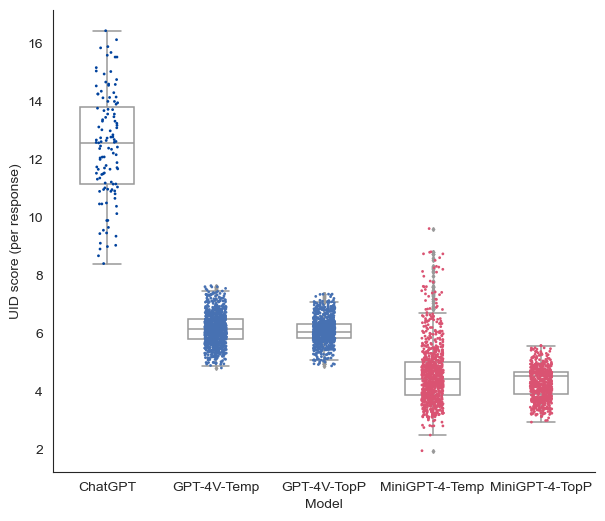

In [329]:
# palette = {'GPT-4V': '#00429d', 
#            'ChatGPT': '#73a2c6',
#            'MiniGPT-4': '#da5372'}

palette = {'ChatGPT': '#00429d', 
           'GPT-4V-Temp': '#4771b2',
           'GPT-4V-TopP': '#4771b2',
           'MiniGPT-4-Temp': '#da5372',
           'MiniGPT-4-TopP': '#da5372'}

plt.figure(figsize=(7, 6))
sns.boxplot(alldf_gpt, x='group', y='uid', color="white", width=0.5, whis=1.5, linewidth=1.1, fliersize=2)
sns.stripplot(alldf_gpt, x='group', y='uid', palette=palette, size=2)
sns.despine()
plt.xlabel("Model")
plt.ylabel("UID score (per response)");

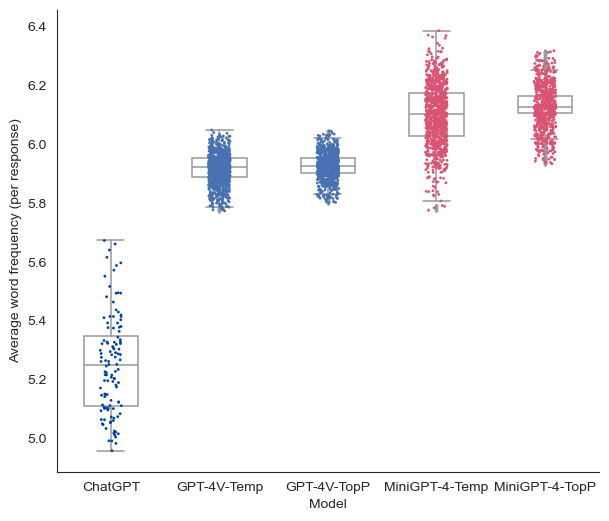

In [328]:
palette = {'ChatGPT': '#00429d', 
           'GPT-4V-Temp': '#4771b2',
           'GPT-4V-TopP': '#4771b2',
           'MiniGPT-4-Temp': '#da5372',
           'MiniGPT-4-TopP': '#da5372'}

plt.figure(figsize=(7, 6))
sns.boxplot(alldf_gpt, x='group', y='avg_freq', color="white", width=0.5, whis=1.5, linewidth=1.1, fliersize=2)
sns.stripplot(alldf_gpt, x='group', y='avg_freq', palette=palette, size=2)
sns.despine()
plt.xlabel("Model")
plt.ylabel("Average word frequency (per response)");

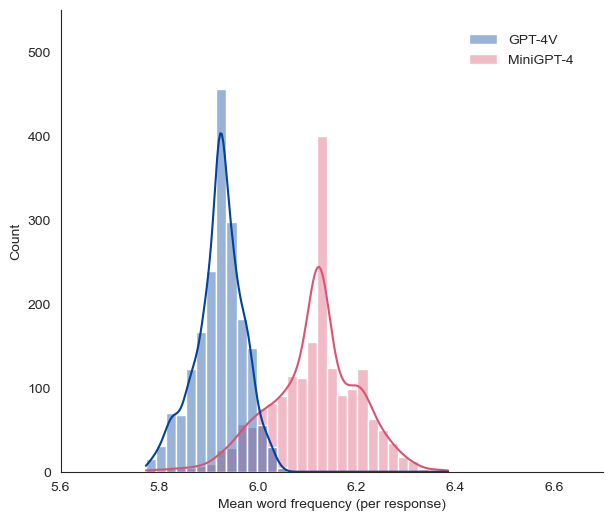

In [320]:
palette = {'GPT-4V': '#00429d', 
           'ChatGPT': '#73a2c6',
           'MiniGPT-4': '#da5372'}
kwargs = {'alpha':0.4}

plt.figure(figsize=(7, 6))
subset = alldf_gpt.loc[alldf_gpt['model'] != 'ChatGPT']
ax = sns.histplot(data=subset, x='avg_freq', hue='model', palette=palette, **kwargs, bins=30, kde=True)
sns.despine()
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.85, 0.85), ncol=1, title=None, frameon=False)

plt.xlim(5.6, 6.7)
plt.ylim(0, 550)
plt.xlabel("Mean word frequency (per response)")
plt.ylabel("Count");
# plt.savefig('plot/hist-freq.png')

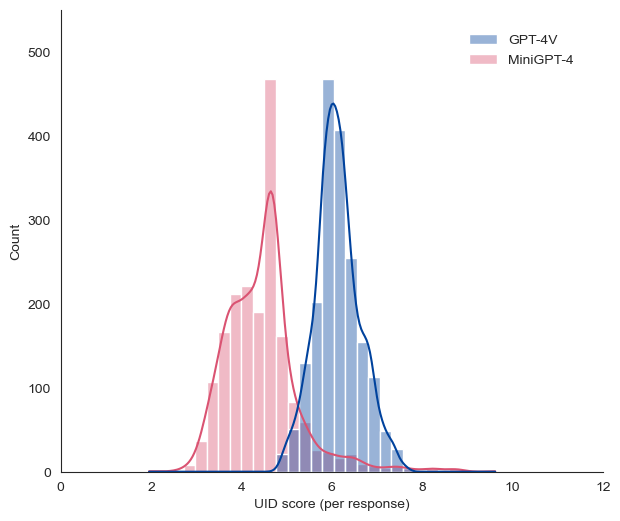

In [321]:
palette = {'GPT-4V': '#00429d', 
           'ChatGPT': '#73a2c6',
           'MiniGPT-4': '#da5372'}
kwargs = {'alpha':0.4}

plt.figure(figsize=(7, 6))
subset = alldf_gpt.loc[alldf_gpt['model'] != 'ChatGPT']
ax = sns.histplot(data=subset, x='uid', hue='model', palette=palette, **kwargs, bins=30, kde=True)
sns.despine()
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.85, 0.85), ncol=1, title=None, frameon=False)

plt.xlim(0, 12)
plt.ylim(0, 550)
plt.xlabel("UID score (per response)")
plt.ylabel("Count");

<Figure size 700x600 with 0 Axes>

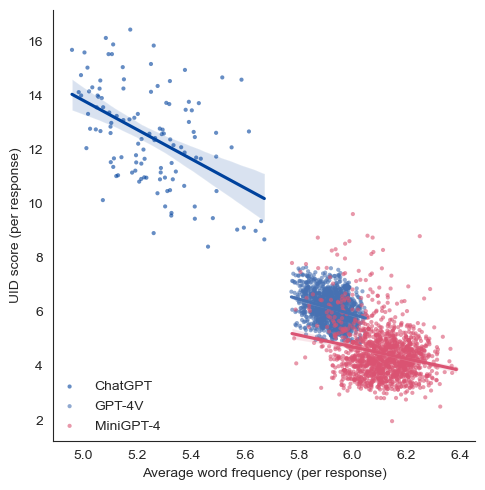

In [327]:
palette = {'GPT-4V': '#4771b2', 
           'ChatGPT': '#00429d',
           'MiniGPT-4': '#da5372'}

plt.figure(figsize=(7, 6))
ax = sns.lmplot(data=alldf_gpt, x='avg_freq', y='uid', hue='model', palette=palette, markers='.', scatter_kws={'alpha':0.6, 'edgecolors':'none'})
sns.despine()
sns.move_legend(
    ax, "lower left",
    bbox_to_anchor=(0.1, 0.1), ncol=1, title=None, frameon=False)

plt.xlabel("Average word frequency (per response)")
plt.ylabel("UID score (per response)");
# plt.savefig('plot/freq-uid.png')

## Relationship between UID and params

In [6]:
scores = pd.read_pickle("data/pickles/random_minigpt.pkl")
scores['eval'] = pd.to_numeric(scores['score'], errors='coerce')
scores.head()

,iteration,num_beam,temperature,top_p,description,id,model,words,surps,uid,avg_info,ttr,avg_freq,score,eval
0,0,1,0.010,0.9,The image shows a woman and two children stand...,1,MiniGPT-4,"[The, Ġimage, Ġshows, Ġa, Ġwoman, Ġand, Ġtwo, ...","[3.276172161102295, 7.5474724769592285, 4.2324...",3.748849,2.408837,0.528736,6.105172,5.8,5.8
1,0,1,0.012,0.9,The image shows a woman and two children stand...,2,MiniGPT-4,"[The, Ġimage, Ġshows, Ġa, Ġwoman, Ġand, Ġtwo, ...","[3.276172161102295, 7.5474724769592285, 4.2324...",3.841741,2.414539,0.552632,5.970526,5.5,5.5
2,0,1,0.014,0.9,The image shows a woman and two children stand...,3,MiniGPT-4,"[The, Ġimage, Ġshows, Ġa, Ġwoman, Ġand, Ġtwo, ...","[3.276172161102295, 7.5474724769592285, 4.2324...",4.657914,2.355983,0.455556,6.124889,4.5,4.5
3,0,1,0.016,0.9,The image shows a woman and two children stand...,4,MiniGPT-4,"[The, Ġimage, Ġshows, Ġa, Ġwoman, Ġand, Ġtwo, ...","[3.276172161102295, 7.5474724769592285, 4.2324...",4.657914,2.355983,0.455556,6.124889,4.5,4.5
4,0,1,0.018,0.9,The image shows a woman and two children stand...,5,MiniGPT-4,"[The, Ġimage, Ġshows, Ġa, Ġwoman, Ġand, Ġtwo, ...","[3.276172161102295, 7.5474724769592285, 4.2324...",4.657914,2.355983,0.455556,6.124889,4.8,4.8


In [9]:
subset = alldf_gpt.loc[alldf_gpt['model'] != 'ChatGPT']
minigpt4 = subset.loc[subset['group'].str.startswith('Mini')]
minigpt4['eval'] = scores['eval'].to_list()

In [10]:
minigpt4_plot = minigpt4.melt(id_vars=['group', 'uid', 'eval', 'avg_freq'], value_vars=['temperature', 'top_p'])
minigpt4_plot.head()

,group,uid,eval,avg_freq,variable,value
0,MiniGPT-4-Temp,3.748849,5.8,6.105172,temperature,0.010
1,MiniGPT-4-Temp,3.841741,5.5,5.970526,temperature,0.012
2,MiniGPT-4-Temp,4.657914,4.5,6.124889,temperature,0.014
3,MiniGPT-4-Temp,4.657914,4.5,6.124889,temperature,0.016
4,MiniGPT-4-Temp,4.657914,4.8,6.124889,temperature,0.018


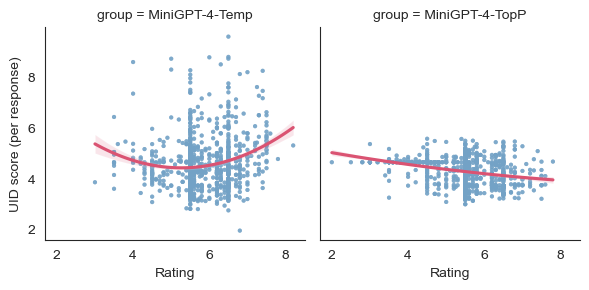

In [332]:
g = sns.FacetGrid(data=minigpt4_plot, col='group')
g.map(sns.regplot, 'eval', 'uid', order=2, marker='.', 
      scatter_kws={'alpha':0.7, 'edgecolors': 'none', 'color':'#73a2c6'}, 
      line_kws={'color':'#da5372'})

g.set(ylabel="UID score (per response)",
      xlabel="Rating");

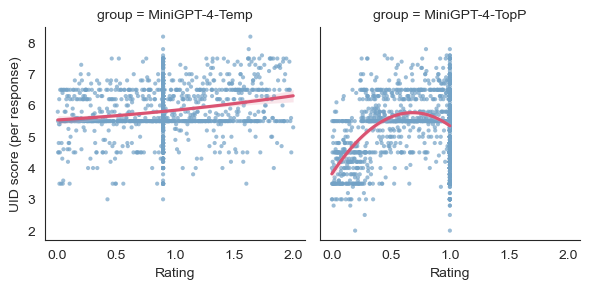

In [12]:
g = sns.FacetGrid(data=minigpt4_plot, col='group')
g.map(sns.regplot, 'value', 'eval', order=2, marker='.', 
      scatter_kws={'alpha':0.7, 'edgecolors': 'none', 'color':'#73a2c6'}, 
      line_kws={'color':'#da5372'})

g.set(ylabel="UID score (per response)",
      xlabel="Rating");

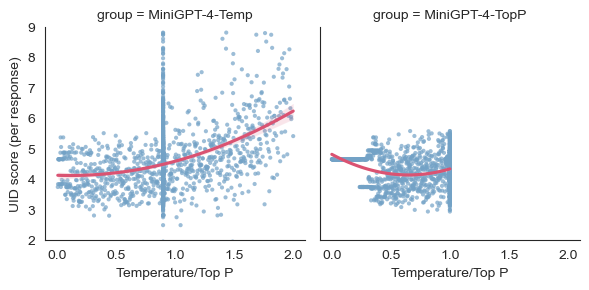

In [354]:
g = sns.FacetGrid(data=minigpt4_plot, col='group')
g.map(sns.regplot, 'value', 'uid', order=2, marker='.', 
      scatter_kws={'alpha':0.7, 'edgecolors': 'none', 'color':'#73a2c6'}, 
      line_kws={'color':'#da5372'})

g.set(ylabel="UID score (per response)",
      xlabel="Temperature/Top P",
      ylim = (2, 9));

In [344]:
gpt4v = subset.loc[subset['group'].str.startswith('GPT')]
gpt4v = gpt4v.melt(id_vars=['group', 'uid', 'avg_freq'], value_vars=['temperature', 'top_p'])
gpt4v.head()

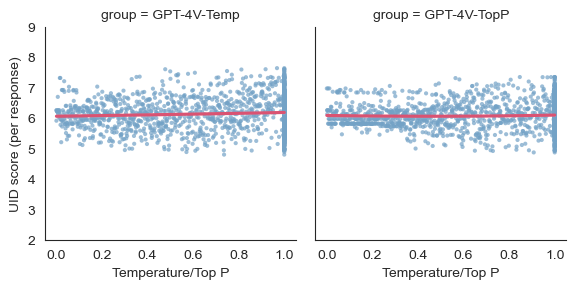

In [355]:
g = sns.FacetGrid(data=gpt4v, col='group')
g.map(sns.regplot, 'value', 'uid', order=2, marker='.', 
      scatter_kws={'alpha':0.7, 'edgecolors': 'none', 'color':'#73a2c6'}, 
      line_kws={'color':'#da5372'})

g.set(ylabel="UID score (per response)",
      xlabel="Temperature/Top P",
      ylim = (2, 9));